In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Caminho para o arquivo CSV com texto pré-processado
cleaned_file_path = r"C:\Users\rebec\OneDrive\Documentos\tweets_cleaned.csv"

In [4]:
# Leitura do arquivo CSV com texto pré-processado
try:
    tweets_df = pd.read_csv(cleaned_file_path)
except FileNotFoundError:
    print(f"Erro: Arquivo '{cleaned_file_path}' não encontrado.")
    exit()

In [5]:
# Listas de palavras-chave 
populist_words = ['elite', 'people', 'corrupt', 'establishment', 'common', 'folk', 'masses', 'grassroots', 'voice', 'ordinary', 'citizen', 'democracy', 'power']
nativist_words = ['immigrant', 'foreign', 'border', 'nationalism', 'patriotism', 'culture', 'heritage', 'homeland', 'native', 'tradition', 'identity', 'sovereignty']
authoritarian_words = ['law', 'order', 'control', 'power', 'strong', 'leader', 'authority', 'force', 'security', 'discipline', 'rule', 'command', 'regime']

In [6]:
# Função para contar palavras-chave
def count_keywords(text, keywords):
    return sum([text.lower().count(word) for word in keywords])


In [7]:
# Aplicação da contagem de palavras-chave para cada ideologia
tweets_df['Populist Words'] = tweets_df['Cleaned Text'].apply(lambda x: count_keywords(x, populist_words))
tweets_df['Nativist Words'] = tweets_df['Cleaned Text'].apply(lambda x: count_keywords(x, nativist_words))
tweets_df['Authoritarian Words'] = tweets_df['Cleaned Text'].apply(lambda x: count_keywords(x, authoritarian_words))

In [8]:
# Dicionário de frequências para cada categoria
populist_freq = tweets_df['Populist Words'].sum()
nativist_freq = tweets_df['Nativist Words'].sum()
authoritarian_freq = tweets_df['Authoritarian Words'].sum()

In [9]:
# Converção da listas de palavras-chave para dicionários vazios
populist_dict = {word: 0 for word in populist_words}
nativist_dict = {word: 0 for word in nativist_words}
authoritarian_dict = {word: 0 for word in authoritarian_words}

In [10]:
# Organização dos dicionários com a contagem real
for index, row in tweets_df.iterrows():
    for word in populist_words:
        populist_dict[word] += row['Cleaned Text'].count(word)
    for word in nativist_words:
        nativist_dict[word] += row['Cleaned Text'].count(word)
    for word in authoritarian_words:
        authoritarian_dict[word] += row['Cleaned Text'].count(word)

In [11]:
# Nuvens de palavras
wordcloud_populist = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(populist_dict)
wordcloud_nativist = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(nativist_dict)
wordcloud_authoritarian = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(authoritarian_dict)

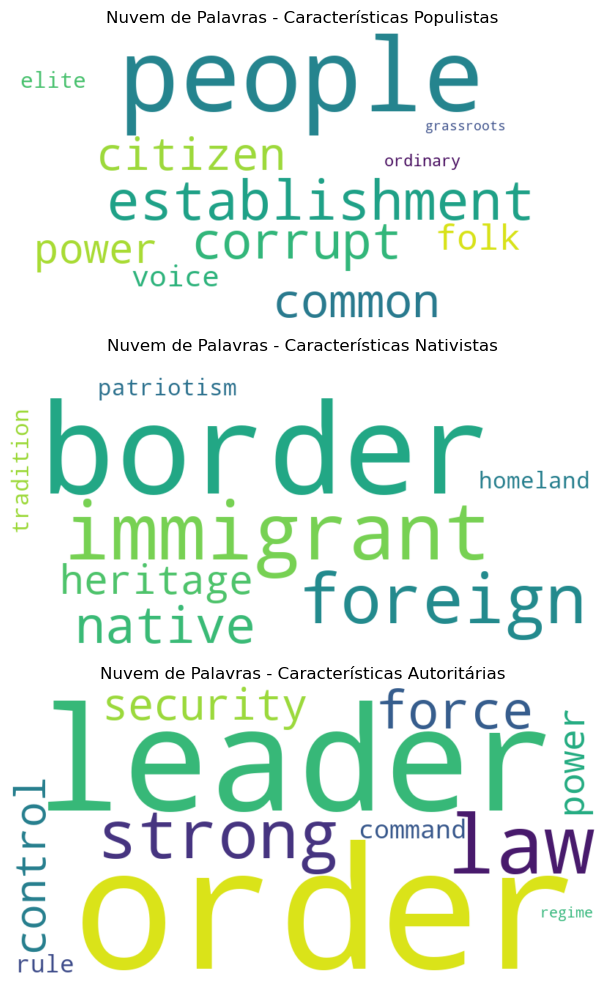

In [13]:
# Plot das nuvens de palavras
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.imshow(wordcloud_populist, interpolation='bilinear')
plt.title('Nuvem de Palavras - Características Populistas')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(wordcloud_nativist, interpolation='bilinear')
plt.title('Nuvem de Palavras - Características Nativistas')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(wordcloud_authoritarian, interpolation='bilinear')
plt.title('Nuvem de Palavras - Características Autoritárias')
plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Tabelas com as 20 palavras mais frequentes para cada categoria
top_n = 20
top_populist_words = pd.DataFrame(sorted(populist_dict.items(), key=lambda x: x[1], reverse=True)[:top_n], columns=['Palavra', 'Frequência'])
top_nativist_words = pd.DataFrame(sorted(nativist_dict.items(), key=lambda x: x[1], reverse=True)[:top_n], columns=['Palavra', 'Frequência'])
top_authoritarian_words = pd.DataFrame(sorted(authoritarian_dict.items(), key=lambda x: x[1], reverse=True)[:top_n], columns=['Palavra', 'Frequência'])

In [16]:
# Tabelas
print("Top 20 palavras mais frequentes - Características Populistas:")
print(top_populist_words)

print("\nTop 20 palavras mais frequentes - Características Nativistas:")
print(top_nativist_words)

print("\nTop 20 palavras mais frequentes - Características Autoritárias:")
print(top_authoritarian_words)

Top 20 palavras mais frequentes - Características Populistas:
          Palavra  Frequência
0          people         497
1   establishment          47
2         corrupt          39
3          common          33
4         citizen          30
5           power          25
6            folk          18
7           voice          12
8           elite           6
9        ordinary           3
10     grassroots           2
11         masses           0
12      democracy           0

Top 20 palavras mais frequentes - Características Nativistas:
        Palavra  Frequência
0        border         130
1     immigrant          36
2       foreign          26
3        native          12
4      heritage           7
5    patriotism           1
6      homeland           1
7     tradition           1
8   nationalism           0
9       culture           0
10     identity           0
11  sovereignty           0

Top 20 palavras mais frequentes - Características Autoritárias:
       Palavra  Frequência